<a href="https://colab.research.google.com/github/vedant-1807/ProjectNotebooks/blob/main/Transfer_learning_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:13<00:00, 136MB/s]
100% 1.06G/1.06G [00:13<00:00, 85.3MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(weights = 'imagenet', 
                  input_shape=(150,150,3),
                  include_top= False)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = False

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [11]:
# generators
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = "/content/dogs_vs_cats/train",
    batch_size = batch_size,
    target_size = (150,150),
    class_mode = 'binary'
)

validation_generator = train_datagen.flow_from_directory(
    directory = "/content/dogs_vs_cats/test",
    batch_size = batch_size,
    target_size = (150,150),
    class_mode = 'binary'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [12]:
model.compile(keras.optimizers.RMSprop(learning_rate=1e-5),loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# normalization




In [15]:
history = model.fit(train_generator,epochs = 10,validation_data = validation_generator)

Epoch 1/10
625/625 [==============================] - 213s 322ms/step - loss: 0.4069 - accuracy: 0.8257 - val_loss: 0.3111 - val_accuracy: 0.8694
Epoch 2/10
625/625 [==============================] - 199s 319ms/step - loss: 0.2910 - accuracy: 0.8763 - val_loss: 0.2692 - val_accuracy: 0.8888
Epoch 3/10
625/625 [==============================] - 198s 317ms/step - loss: 0.2638 - accuracy: 0.8878 - val_loss: 0.2618 - val_accuracy: 0.8898
Epoch 4/10
625/625 [==============================] - 199s 318ms/step - loss: 0.2514 - accuracy: 0.8956 - val_loss: 0.2449 - val_accuracy: 0.8954
Epoch 5/10
625/625 [==============================] - 198s 318ms/step - loss: 0.2405 - accuracy: 0.8988 - val_loss: 0.2393 - val_accuracy: 0.8984
Epoch 6/10
625/625 [==============================] - 200s 320ms/step - loss: 0.2359 - accuracy: 0.9028 - val_loss: 0.2345 - val_accuracy: 0.8974
Epoch 7/10
625/625 [==============================] - 204s 327ms/step - loss: 0.2301 - accuracy: 0.9043 - val_loss: 0.2288 -

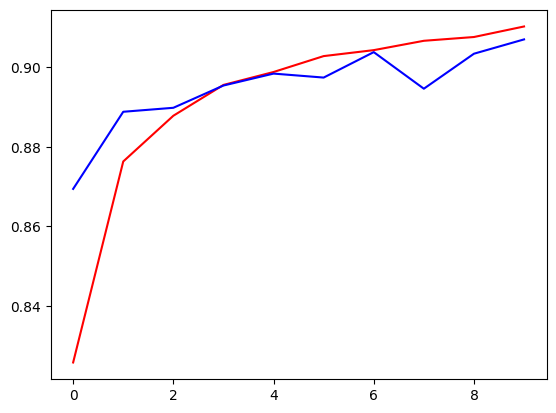

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red',label='train')
plt.plot(history.history['val_accuracy'],color = 'blue',label='validation')